# 머신러닝 개인 프로젝트

# Height vs Weight

In [3]:
# Height and Weight
# 성별, 키로 적정 몸무게 측정 

# 라이브러리 
import pandas as pd # 배열 
import matplotlib.pyplot as plt # 그래프 시각화
import seaborn as sns # 데이터 시각화
from sklearn.model_selection import train_test_split # 데이터 분할 (훈령용/테스트용)
from sklearn.linear_model import LinearRegression # 선형 회귀 모델
from sklearn.ensemble import RandomForestRegressor # 랜덤 프레스트 회귀 모델
from sklearn.metrics import mean_squared_error # 모델 성과지표

In [4]:
# 데이터 로드
df = pd.read_csv('dataset/weight-height.csv') # csv 파일 불러오기

In [5]:
# 전처리 
df = df.dropna() # 결측치 완전 제거

In [6]:
df.isna().sum() # 결측치 확인

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) # 성별
# Male은 0, Female은 1로 숫자 반환

In [8]:
# 데이터 확인 
df.head() # 앞에서 5개 데이터

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [9]:
df.tail() # 뒤에서 5개 데이터

,Gender,Height,Weight
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461
9999,1,61.944246,113.649103


In [10]:
# 독립변수(X)와 종속변수(y) 분리
X = df[['Height', 'Gender']] # 원인 (신장, 성별)
y = df['Weight'] # 결과 (몸무게)

In [11]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#  훈련용 80%, 테스트용 20%

## 선형회귀

In [12]:
# 선형 회귀 모델 
# 모델 생성 및 학습
linear_model = LinearRegression() # 선형회귀 모델 생성
linear_model.fit(X_train, y_train) # 훈련용 데이터로 학습

LinearRegression()

In [13]:
# 데이터 예측
y_pred_linear = linear_model.predict(X_test) # 학습한 훈련용 데이터로 테스트용 데이터 예측

In [14]:
# 성능 평가 (MSE)
linear_mse = mean_squared_error(y_test, y_pred_linear) # 회귀 모델
print("선형 회귀 모델, MSE(평균제곱오차):", linear_mse)

선형 회귀 모델, MSE(평균제곱오차): 101.24427647013299


# 랜덤 포레스트 모델

In [15]:
# 랜덤 포레스트 모델 
# 데이터 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # 교차 검증
rf_model.fit(X_train, y_train) # 훈련용 데이터로 학습

RandomForestRegressor(random_state=42)

In [16]:
# 테스트용 데이터로 예측
y_pred_rf = rf_model.predict(X_test)

In [17]:
# 성능 평가 (MSE)
rf_mse = mean_squared_error(y_test, y_pred_rf)  # 랜덤 포레스트 회귀 모델
print("랜덤 포레스트 모델, MSE(평균제곱오차):", rf_mse)

랜덤 포레스트 모델, MSE(평균제곱오차): 145.38559400652971


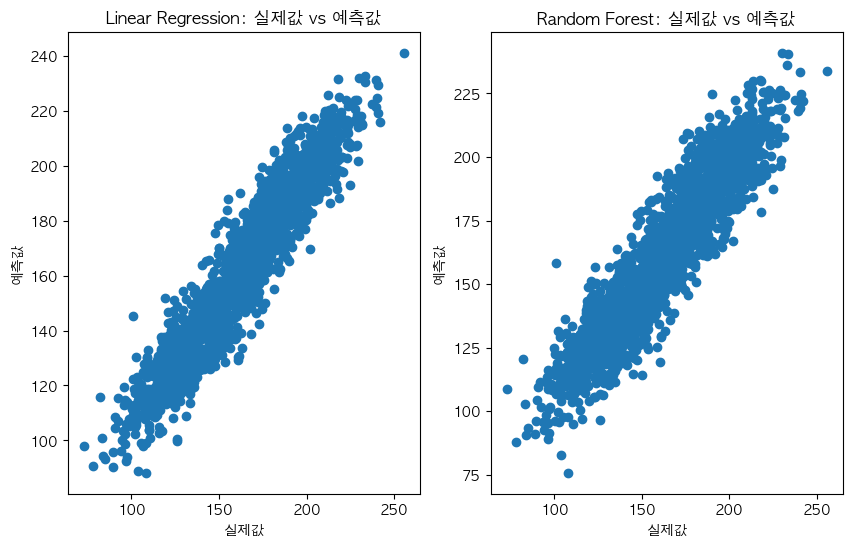

In [18]:
# 예측값 vs 실제값 비교 시각화
plt.figure(figsize=(10,6)) # 그래프의 크기

# 폰트 지정
plt.rcParams['font.family'] = 'AppleGothic' # 한글 깨짐 방지
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False 


# 선형 회귀 모델 비교
plt.subplot(1,2,1) # 1행 2열의 첫번째 
plt.scatter(y_test, y_pred_linear)
plt.title('Linear Regression: 실제값 vs 예측값')
plt.xlabel('실제값')
plt.ylabel('예측값')


# 랜덤 포레스트 모델 비교
plt.subplot(1,2,2) # 1행 2열의 두번째
plt.scatter(y_test, y_pred_rf) 
plt.title('Random Forest: 실제값 vs 예측값')
plt.xlabel('실제값')
plt.ylabel('예측값')

plt.show()

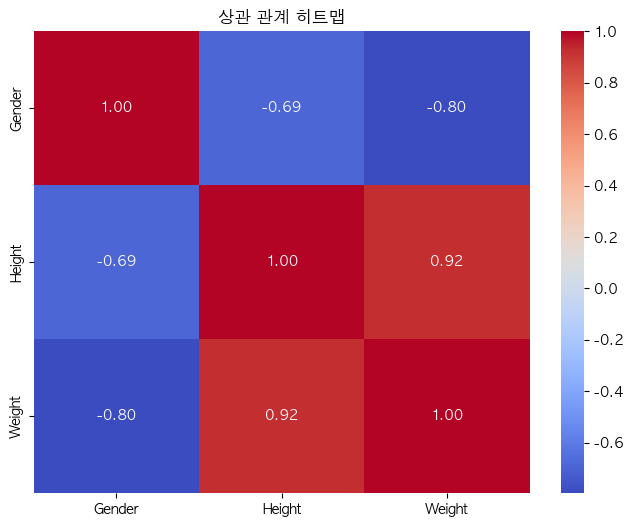

In [19]:
# 상관관계 히트맵 시각화
correlation_matrix = df.corr() # 변수 간의 상관관계 계산

# 폰트 지정
plt.rcParams['font.family'] = 'AppleGothic' # 한글 깨짐 방지
 # 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(8,6)) # 그래프 크기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') # 히트맵 출력
# 파란색 : 음, 빨간색 : 양
plt.title('상관 관계 히트맵')  # 히트맵 제목
plt.show() # 그래프 시각화

In [20]:
from ydata_profiling import ProfileReport

# 데이터 정보 출력
print(df.info())

# YData Profiling으로 데이터 프로파일링 보고서 생성
profile = ProfileReport(df, title="Diabetes Dataset Profiling Report", explorative=True)

# 보고서를 HTML 파일로 저장 
output_file = 'report/heightvsweight.html'
profile.to_file(output_file)
print(f"프로파일링 보고서가 생성되었습니다: {output_file}") # find에서 파일 열기

/Users/hwangseoyeong/Documents/ai/project/stproject/stproject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB
None


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 320.30it/s]

프로파일링 보고서가 생성되었습니다: report/heightvsweight.html
